In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [2]:
filepath = "./Data/iot23_all_combined.csv"

In [11]:
df = pd.read_csv(filepath)

In [12]:
del df['Unnamed: 0']

In [13]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label,...,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,-1.000000,-1,-1,0.0,6.0,360.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan-Attack,...,0,0,0,1,0,0,0,0,0,0
1,-1.000000,-1,-1,0.0,6.0,360.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan-Attack,...,0,0,0,1,0,0,0,0,0,0
2,-1.000000,-1,-1,0.0,6.0,360.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan-Attack,...,0,0,0,1,0,0,0,0,0,0
3,-1.000000,-1,-1,0.0,6.0,360.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan-Attack,...,0,0,0,1,0,0,0,0,0,0
4,-1.000000,-1,-1,0.0,6.0,360.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan-Attack,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151430,17.085302,212,285,0.0,2.0,268.0,1.0,313.0,Benign,Benign,...,0,0,0,0,0,0,0,1,0,0
151431,0.000000,0,0,0.0,1.0,134.0,0.0,0.0,Benign,Benign,...,0,0,0,1,0,0,0,0,0,0
151432,3.652672,183,800,0.0,5.0,323.0,6.0,968.0,Benign,Benign,...,0,0,0,0,0,0,0,1,0,0
151433,27.987099,206,0,0.0,2.0,262.0,0.0,0.0,Benign,Benign,...,0,0,0,1,0,0,0,0,0,0


In [14]:
# df.loc[(df.category == 'Malware'), 'category'] = 1
# df.loc[(df.category == 'Benign'), 'category'] = 0
# df['category'].value_counts()
df.loc[(df.label == 'Malicious'), 'label'] = 1
df.loc[(df.label == 'Benign'), 'label'] = 0
df['label'].value_counts()

0    76193
1    75242
Name: label, dtype: int64

In [15]:
# XGB = XGBClassifier()
# param_dist = {
# 'n_estimators':range(80,200,20),
# # 'max_depth':range(4,10,1),
# # 'learning_rate':np.linspace(0.01,2,20),
# # 'subsample':np.linspace(0.7,0.9,20),
# # 'colsample_bytree':np.linspace(0.5,0.98,10),
# 'min_child_weight':range(2,5,1)
# }
XGB = XGBClassifier(n_estimators=200,max_depth=10,learning_rate=0.005)


In [16]:
# X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'service_-', 'service_dhcp', 'service_dns', 'service_http', 'service_ssh', 'service_ssl', 'service_irc', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']].values
# Y = df['category'].values
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
# Y_train, Y_test = Y_train.astype(int), Y_test.astype(int)
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'service_-', 'service_dhcp', 'service_dns', 'service_http', 'service_ssh', 'service_ssl', 'service_irc', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']].values
Y = df['label'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
Y_train, Y_test = Y_train.astype(int), Y_test.astype(int)

In [17]:
type(Y_train)
print(Y_train.size)
Y_train

121148


array([1, 0, 0, ..., 0, 0, 0])

In [18]:
start = time.time()
print('program start...')
print()

#GridSearchCV参数说明，clf1设置训练的学习器
#param_dist字典类型，放入参数搜索范围
#scoring = 'neg_log_loss'，精度评价方式设定为“neg_log_loss“
#n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
#n_jobs = -1，使用所有的CPU进行训练，默认为1，使用1个CPU
# grid = GridSearchCV(XGB, param_dist, cv = 3, scoring = 'neg_log_loss', n_jobs = 8)
CLF = XGB.fit(X_train,np.ravel(Y_train))
#在训练集上训练
# grid.fit(X_train,np.ravel(Y_train))
#返回最优的训练器
# best_estimator = grid.best_estimator_
# print(best_estimator)
# print(grid.best_score_)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

[17:09:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


program end...

time cost: 
2.4029741287231445 seconds


In [19]:
print('prediction:')
y_pred = CLF.predict(X_test)
print(y_pred)
print()

print('Score:')
score = CLF.score(X_test,Y_test)
print(score)

prediction:
[1 1 1 ... 0 0 0]

Score:
1.0


In [45]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
              precision    recall  f1-score   support

           0       0.93      0.82      0.87    472533
           1       0.84      0.94      0.89    472551

    accuracy                           0.88    945084
   macro avg       0.89      0.88      0.88    945084
weighted avg       0.89      0.88      0.88    945084



/media/wuguo-buaa/LENOVO_USB_HDD/PycharmProjects/Machine_learning_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['0' '1']

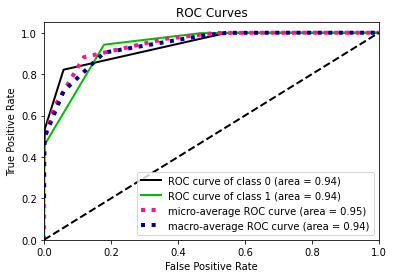

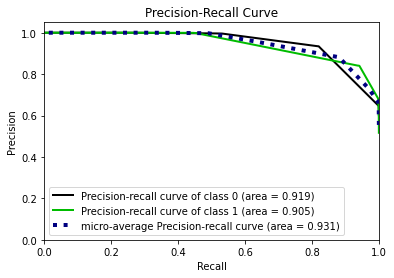

In [46]:
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt
predicted_probas = xgb_clasifier.predict_proba(X_test)
#ROC曲线
skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.savefig('./XGB/PIC/model_classification_roc.jpg')
#P-R曲线
skplt.metrics.plot_precision_recall_curve(Y_test, predicted_probas, cmap='nipy_spectral')
plt.savefig('./XGB/PIC/model_classification_pr.jpg')

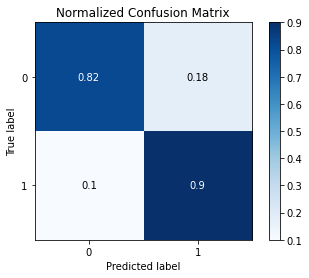

In [48]:
#混淆矩阵
predictions = cross_val_predict(xgb_clasifier, X, Y.astype(int))
plot = skplt.metrics.plot_confusion_matrix(Y.astype(int), predictions, normalize=True)
plt.savefig('./XGB/PIC/model_classification_confusionMatrix.jpg')

In [49]:
import joblib
#lr是一个DT模型
joblib.dump(xgb_clasifier, './XGB/XGB.model')
# DT = joblib.load('dt.model')

['./XGB/XGB.model']